### 울음소리 분석

0. 오늘 울음 횟수 분석(일간)

   - 오늘 발생한 울음을 분석한다.

   - 각각 설명을 보여준다.

   - 새로운 페이지로 넘어가서 보여준다.(2주일 이전의 내용을 보고 싶다면 프리미엄을 구매해야 함.)

1. 아기가 주로 우는 시간대 분석(월간)

   - 울음 분도를 통해 하루 중 가장 울음이 많이 발생하는 시간대를 분석한다.

   - x축에 시간, y축은 울음 빈도로 하는 히스토그램을 그린다.

2. 일별 울음 빈도 분석(월간)

   - 일별 울음 빈도를 분석한다.

   - x축에 날짜, y축은 울음 빈도로 하는 선 그래프를 그린다.

3. 아기 울음 원인 분석(월간)

   - 아기의 울음 원인 빈도를 분석한다.

   - 7가지의 울음 원인 횟수와 비율을 보여주는 파이 차트를 그린다.

4. 아기 울음 원인에 따른 울음 지속 시간 분석

   - 아기의 울음 원인에 따른 울음 지속 시간을 분석한다.

   - 울음 예측 확률 표시하는 바와 같이 각각의 울음 원인에 따른 울음 지속 시간을 표시하는 가로 막대 그래프.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

res = {}

csv_path = "./test.csv"
df = pd.read_csv(csv_path)
df['time'] = pd.to_datetime(df['time'])
df.head(3)

,id,babyId,time,type,audioId,predictMap,intensity,duration
0,119,355cf5e3-71a3-4807-885a-441620a5efc8,2023-10-28 16:16:50,hug,audioId118,"{'hug': 0.798, 'sad': 0.0, 'awake': 0.0, 'diap...",high,11.67
1,121,355cf5e3-71a3-4807-885a-441620a5efc8,2023-10-28 21:42:45,sad,audioId120,"{'hug': 0.0, 'sad': 0.879, 'awake': 0.0, 'diap...",medium,15.74
2,122,355cf5e3-71a3-4807-885a-441620a5efc8,2023-10-29 23:04:33,hungry,audioId121,"{'hug': 0.0, 'sad': 0.0, 'awake': 0.0, 'diaper...",medium,4.60


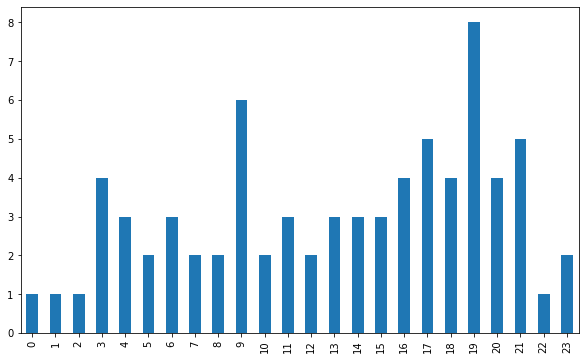

In [2]:
# 1. 주로 우는 시간대 분석
cry_freq_hour = df['time'].dt.hour.value_counts().sort_index()
res['cry_freq_hour'] = cry_freq_hour.tolist()

cry_freq_hour.plot(kind='bar', figsize=(10, 6))
plt.show()

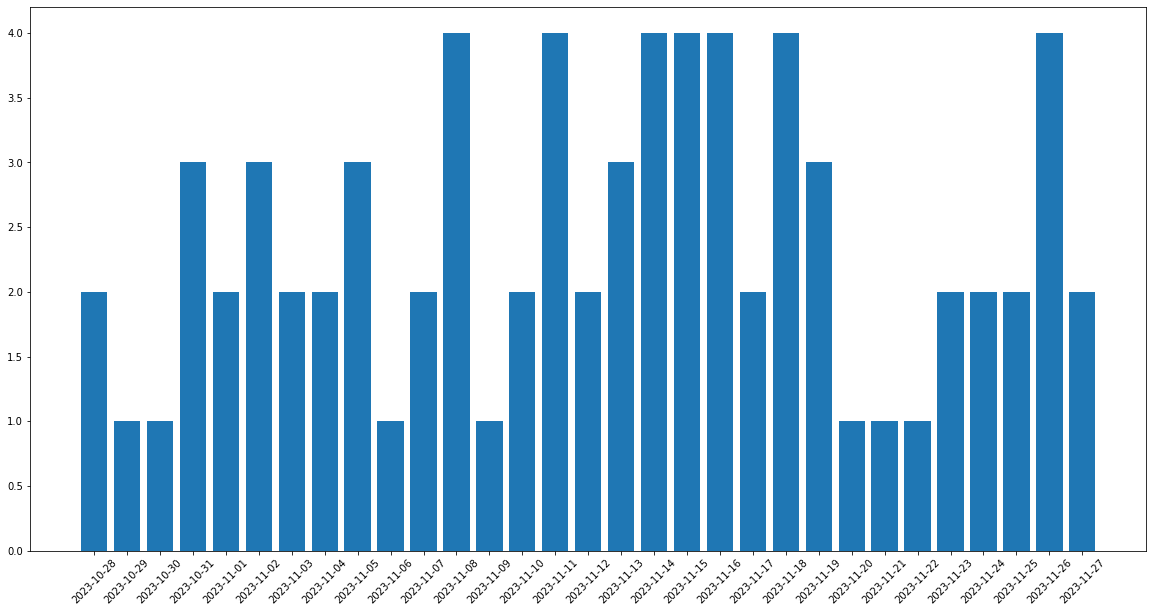

In [3]:
# 2. 일별 울음 빈도 분석
cry_freq_date = df[['id']].groupby(df['time'].dt.date).count().reset_index()
cry_freq_date['time'] = cry_freq_date['time'].astype(str)
res['cry_freq_date'] = {
    'date': cry_freq_date['time'].tolist(),
    'freqs': cry_freq_date['id'].tolist()
}

plt.figure(figsize=(20, 10))
plt.bar(cry_freq_date['time'], cry_freq_date['id'])
plt.xticks(rotation=45)
plt.show()

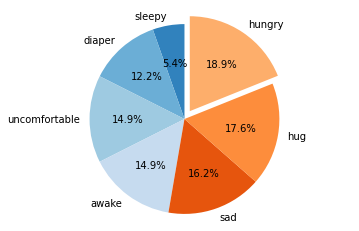

In [4]:
# 3. 울음 원인 빈도 분석
type_freq = df['type'].value_counts()
type_freq.sort_values(ascending=True, inplace=True)
res['type_freq'] = type_freq.to_dict()

cmp = plt.get_cmap("tab20c")
plt.pie(type_freq,
        labels=type_freq.index,
        explode=(*np.zeros(len(type_freq)-1), 0.1),
        autopct='%1.1f%%',
        colors=cmp(np.arange(7)),
        startangle=90)
plt.axis('equal')
plt.show()

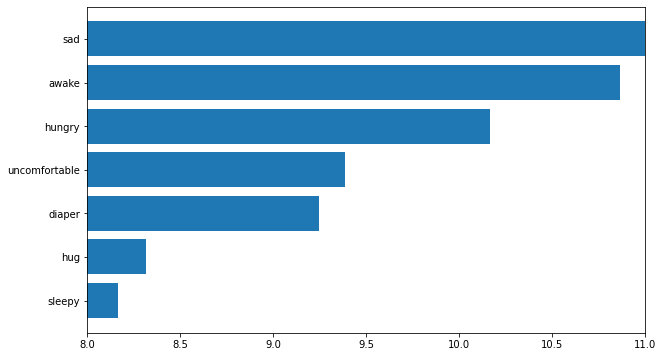

In [77]:
# 4. 울음 원인에 따른 울음 지속시간 분석
duration_of_type = df[['type', 'duration']].groupby('type').mean()
duration_of_type.sort_values(by='duration', inplace=True)

min_value = duration_of_type['duration'].min().astype(int)
max_value = duration_of_type['duration'].max().astype(int)
duration_of_type['duration'] -= min_value
bar_percent = (duration_of_type['duration'] /
               duration_of_type['duration'].max()).round(3)

res['duration_of_type'] = {
    'type': duration_of_type.index.tolist(),
    'duration': duration_of_type['duration'].round(3).tolist(),
    'bar_percent': bar_percent.tolist()
}
res['duration_of_type']

plt.figure(figsize=(10, 6))
plt.barh(duration_of_type.index, duration_of_type['duration'], left=min_value)
plt.xlim(min_value, max_value)
plt.show()

In [76]:
# response
import json
from datetime import datetime


def save_log(file_name: str, res: dict):
    with open(file_name, 'w') as f:
        f.write(json.dumps(res))


cur_time = datetime.now().strftime('%Y-%m-%d_%H:%M:%S')
baby_id = 'baby-id-123'
log_file_name = f'{baby_id}_{cur_time}'
save_log(f'./{log_file_name}.json', res)
res['logId'] = log_file_name

In [21]:
from datetime import datetime
from typing import Union, Set


def process_date(start: str = None, end: str = None) -> Union[str, Set[datetime]]:
    start_date = None
    end_date = None

    if start == None and end == None:
        end_date = datetime.now()
        start_date = end_date.replace(day=end_date.day-7)

    if start != None and end == None:
        end_date = datetime.now()

    if start == None and end != None:
        return "start date not provided"

    if start_date == None:
        try:
            start_date = datetime.strptime(start, '%Y-%m-%d')
        except Exception as e:
            return "date format is not correct"
    if end_date == None:
        try:
            end_date = datetime.strptime(end, '%Y-%m-%d')
        except Exception as e:
            return "date format is not correct"
    return start_date, end_date

'date format is not correct'